### Github: 
https://github.com/luanrubensf/titanic-ml

In [1]:
%run './plot_confusion_matrix.ipynb'

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Display plots inline and change default figure size
%matplotlib inline

In [2]:
random_state = 1
np.random.seed(seed=random_state)

In [3]:
df = pd.read_csv('./data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Age
Assigning the NaN ages with the mean of the ages

In [4]:
mean_age = df['Age'].mean()
mean_age

29.69911764705882

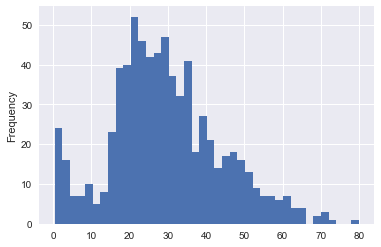

In [5]:
df['Age'].plot.hist(bins=40)

In [6]:
df['Age'] = df['Age'].fillna(mean_age)

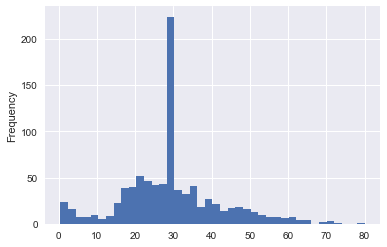

In [7]:
df['Age'].plot.hist(bins=40)

### Sex
Assigning numeric values to the column Sex

In [8]:
df['Sex_id'] = df['Sex'].apply(lambda x: 0 if x == 'male' else 1)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_id
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Selecting features

In [10]:
#Pclass, Sex_id, Age, Sibsp, Parch, Fare
df_features = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex_id']]

In [11]:
df_features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_id
0,3,22.0,1,0,7.2500,0
1,1,38.0,1,0,71.2833,1
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,1
4,3,35.0,0,0,8.0500,0


### Normalizing data

In [12]:
X = df_features.as_matrix()
X

array([[  3.        ,  22.        ,   1.        ,   0.        ,
          7.25      ,   0.        ],
       [  1.        ,  38.        ,   1.        ,   0.        ,
         71.2833    ,   1.        ],
       [  3.        ,  26.        ,   0.        ,   0.        ,
          7.925     ,   1.        ],
       ..., 
       [  3.        ,  29.69911765,   1.        ,   2.        ,
         23.45      ,   1.        ],
       [  1.        ,  26.        ,   0.        ,   0.        ,
         30.        ,   0.        ],
       [  3.        ,  32.        ,   0.        ,   0.        ,
          7.75      ,   0.        ]])

In [13]:
X = normalize(X)
X

array([[ 0.12832206,  0.94102848,  0.04277402,  0.        ,  0.31011166,
         0.        ],
       [ 0.01237655,  0.47030896,  0.01237655,  0.        ,  0.88224143,
         0.01237655],
       [ 0.10963184,  0.95014262,  0.        ,  0.        ,  0.28961078,
         0.03654395],
       ..., 
       [ 0.07886712,  0.78076129,  0.02628904,  0.05257808,  0.61647799,
         0.02628904],
       [ 0.02518165,  0.65472285,  0.        ,  0.        ,  0.75544945,
         0.        ],
       [ 0.09074   ,  0.96789329,  0.        ,  0.        ,  0.23441166,
         0.        ]])

In [14]:
X.shape

(891, 6)

In [15]:
Y = df['Survived'].as_matrix()
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

In [16]:
Y.shape

(891,)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 6)
(623,)
(268, 6)
(268,)


### Machine learning methods

### RNA

In [19]:
mlp_model = MLPClassifier(activation='relu', 
                          solver='lbfgs',
                          hidden_layer_sizes=(6,), 
                          max_iter=1000, 
                          random_state=random_state, 
                          learning_rate_init=0.01,
                          alpha=0.00001,
                          verbose=True)

In [20]:
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6,), learning_rate='constant',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [21]:
predictions_mlp = mlp_model.predict(X_test)

In [22]:
print(classification_report(y_test, predictions_mlp))

             precision    recall  f1-score   support

          0       0.82      0.83      0.82       153
          1       0.77      0.76      0.76       115

avg / total       0.80      0.80      0.80       268



In [23]:
print(accuracy_score(y_test, predictions_mlp))

0.798507462687


In [24]:
print(recall_score(y_test, predictions_mlp))

0.75652173913


Confusion matrix, without normalization
[[127  26]
 [ 28  87]]


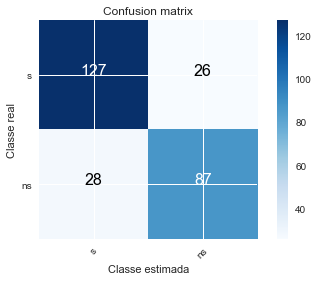

In [30]:
cm_mlp = confusion_matrix(y_test, predictions_mlp)
plot_confusion_matrix(cm_mlp, ['s', 'ns'], font_size=16)

### SVM 

In [31]:
svc_model = SVC(C=11.1, gamma=8.4, 
                kernel='rbf',
                class_weight='balanced',
                tol=1e-5,
                max_iter=100000000,
                random_state=random_state)

In [32]:
svc_model.fit(X_train, y_train)

SVC(C=11.1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=8.4, kernel='rbf',
  max_iter=100000000, probability=False, random_state=1, shrinking=True,
  tol=1e-05, verbose=False)

In [33]:
predictions_svc = svc_model.predict(X_test)

In [34]:
print(classification_report(y_test, predictions_svc))

             precision    recall  f1-score   support

          0       0.85      0.76      0.80       153
          1       0.72      0.83      0.77       115

avg / total       0.80      0.79      0.79       268



In [35]:
print(accuracy_score(y_test, predictions_svc))

0.787313432836


In [36]:
print(recall_score(y_test, predictions_svc))

0.826086956522


Confusion matrix, without normalization
[[116  37]
 [ 20  95]]


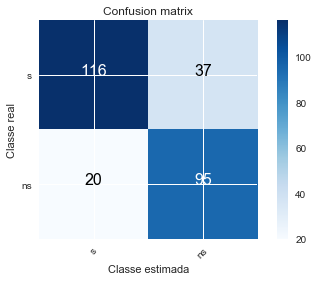

In [37]:
cm_svm = confusion_matrix(y_test, predictions_svc)
plot_confusion_matrix(cm_svm, ['s', 'ns'], font_size=16)

### Random forest

In [38]:
rf_model = RandomForestClassifier(
    n_estimators=1000,
    max_depth=None,
    max_features='log2',
    random_state=random_state
)

In [39]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [40]:
predictions_rf = rf_model.predict(X_test)

In [41]:
print(classification_report(y_test, predictions_rf))

             precision    recall  f1-score   support

          0       0.75      0.88      0.81       153
          1       0.79      0.62      0.69       115

avg / total       0.77      0.76      0.76       268



In [42]:
print(accuracy_score(y_test, predictions_rf))

0.764925373134


In [43]:
print(recall_score(y_test, predictions_rf))

0.617391304348


Confusion matrix, without normalization
[[134  19]
 [ 44  71]]


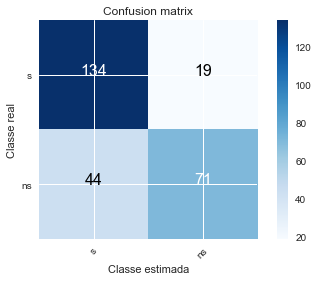

In [44]:
cm_random = confusion_matrix(y_test, predictions_rf)
plot_confusion_matrix(cm_random, ['s', 'ns'], font_size=16)